In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Load the train data

In [2]:
train_data = pd.read_csv("train_data.csv.gz", compression="gzip", encoding="utf8")

In [3]:
train_data.head()

,author,subreddit,created_utc,body
0,ejchristian86,TwoXChromosomes,1.388534e+09,I hadn't ever heard of them before joining thi...
1,Shamus_Aran,mylittlepony,1.388534e+09,I don't think we'd get nearly as much fanficti...
2,Riddance,sex,1.388534e+09,"Thanks. I made it up, that's how I got over my..."
3,savoytruffle,AskReddit,1.388534e+09,bite me
4,Secret_Wizard,DragonsDogma,1.388534e+09,Are you sure you aren't confusing Cyclops (the...


In [4]:
target = pd.read_csv("train_target.csv")

In [5]:
target.head()

,author,gender
0,RedThunder90,0
1,Lirkmor,1
2,In0chi,0
3,ProjectGrudge,0
4,TehTurtleHermit,0


In [6]:
train_data[train_data.author=='savoytruffle']

,author,subreddit,created_utc,body
3,savoytruffle,AskReddit,1.388534e+09,bite me
9,savoytruffle,AskReddit,1.388534e+09,too bad\n\nIf I was some thirty starving boys ...
53,savoytruffle,AskReddit,1.388535e+09,Are there men that don't enjoy sex?
74,savoytruffle,AskReddit,1.388535e+09,I don't know. I should probably record my pare...
84,savoytruffle,AskReddit,1.388535e+09,but why?
91,savoytruffle,AskReddit,1.388535e+09,ouch for her! but that is adorable!
100,savoytruffle,AskReddit,1.388535e+09,Gay men enjoy sex most of all!
115,savoytruffle,AskReddit,1.388535e+09,"Not on Netflix, but I think via BitTorrent I j..."
169,savoytruffle,AskReddit,1.388535e+09,Probably yes but I believe the grammar for Ame...
191,savoytruffle,AskReddit,1.388535e+09,Who would say that?


In [6]:
train_data.subreddit.unique().shape

(3866,)

# Feature Extraction

In [7]:
subreddits = train_data.subreddit.unique()
subreddits_map = pd.Series(index=subreddits, data=arange(subreddits.shape[0]))

In [8]:
subreddits_map

TwoXChromosomes         0
mylittlepony            1
sex                     2
AskReddit               3
DragonsDogma            4
malefashionadvice       5
Pathfinder_RPG          6
todayilearned           7
Terraria                8
MarkMyWords             9
skateboarding          10
Christianity           11
NetflixBestOf          12
TrollXChromosomes      13
movies                 14
Android                15
hockey                 16
Music                  17
AskWomen               18
secretsanta            19
explainlikeimfive      20
rangers                21
AdviceAnimals          22
AskMen                 23
hiphopheads            24
TheRedPill             25
MakeupAddiction        26
mildlyinteresting      27
jailbreak              28
ShitRedditSays         29
                     ... 
Navia                3836
nes                  3837
IndianaUniversity    3838
RateMyMayor          3839
CharitableBets       3840
alcoholism           3841
gaybears             3842
Dinosaurs   

In [9]:
from scipy import sparse

In [10]:
def extract_features(group):
    group_subreddits = group['subreddit'].values
    idxs = subreddits_map[group_subreddits].values
    v = sparse.dok_matrix((1, subreddits.shape[0]))
    for idx in idxs:
        if not np.isnan(idx):
            v[0, idx] += 1
    v = v/v.sum()
    return v.tocsr()

extract_features(train_data[train_data.author=='RedThunder90'])

<1x3866 sparse matrix of type '<type 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [41]:
group = train_data[train_data.author=='ejchristian86']

In [42]:
group_values = group['subreddit'].values

In [28]:
group_values.sum()

u'TwoXChromosomesharrypotterRedditLaqueristasknittingTrollXChromosomesTrollXChromosomesTrollXChromosomesTrollXChromosomesRedditLaqueristasdoctorwhoXFilesawwknittingawwawwawwTrollXChromosomesAskReddittodayilearnedTrollXChromosomesTrollXChromosomesTrollXChromosomesTrollXChromosomesTrollXChromosomestappedoutpicsTrollXChromosomesTrollXChromosomesTrollXChromosomesXFilesdoctorwhoTrollXChromosomesTrollXChromosomesTrollXChromosomestappedoutTrollXChromosomesAdviceAnimalsknittingTrollXChromosomesTrollXChromosomesknittingTrollXChromosomesknittingknittingTrollXChromosomesAskRedditTrollXChromosomesTrollXChromosomesTrollYChromosomeknittingTrollYChromosomeTrollXChromosomesRedditLaqueristasknittingknittingRedditLaqueristasXFilesRedditLaqueristasAskRedditTrollXChromosomesTrollXChromosomesAskRedditTrollXChromosomesawwawwfoodawwawwTrollXChromosomesawwawwknittingknittingRedditLaqueristasTrollXChromosomesknittingTrollXChromosomesRedditLaqueristasRedditLaqueristasRedditLaqueristasRedditLaqueristasRedditLaqu

In [11]:
prova1= extract_features(train_data[train_data.author=='kirocuto'])
prova1 = prova1.todense()
#prova1 = prova1.tolist()

In [13]:
for i in prova1.flat:
    if i !=0: print i

0.142857142857
0.428571428571
0.428571428571


In [12]:
train_data[train_data.author=='kirocuto']

,author,subreddit,created_utc,body
11378,kirocuto,matt,1.388608e+09,You and me both brother.\n\nIn this together!
11379,kirocuto,matt,1.388608e+09,You and me both brother.\n\nIn this together!
38534,kirocuto,matt,1.388728e+09,Us matts know inherently which matt is being a...
368673,kirocuto,AskReddit,1.389974e+09,Where would you get your ship?
372200,kirocuto,leagueoflegends,1.389986e+09,Play Cass like you would kog with better wave ...
635353,kirocuto,leagueoflegends,1.390609e+09,Turns out one extra champ is all it takes to m...
735715,kirocuto,leagueoflegends,1.391104e+09,Twisted fate vs fizz.\n\nTf has no damage earl...


In [14]:
features_dict = {}

for author, group in train_data.groupby('author'):
    features_dict[author] = extract_features(group)

In [50]:
features_dict['kirocuto']

<1x3866 sparse matrix of type '<type 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [15]:
X = sparse.vstack([features_dict[author] for author in target.author])
X

<10000x3866 sparse matrix of type '<type 'numpy.float64'>'
	with 96876 stored elements in Compressed Sparse Row format>

In [17]:
X.todense()

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [18]:
#pd.DataFrame(X)

In [16]:
y = target.gender

# Model Selection

In [18]:
from sklearn import cross_validation as cs

In [19]:
X_train, X_test, y_train, y_test =\
cs.train_test_split(X,y, test_size=0.33,random_state=42)

In [20]:
from sklearn import svm

model = svm.SVC(kernel='rbf', gamma=0.1, C=100., probability=True)
model.fit(X_train,y_train)

y_pred = model.predict_proba(X_test)


In [ ]:
#AUC: 0.832226729132 con matrice di uni e zeri

AUC: 0.854648844174
[<matplotlib.lines.Line2D object at 0x7f4e018d1d90>, <matplotlib.lines.Line2D object at 0x7f4e018d1f90>]


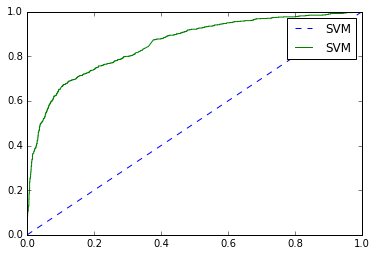

In [21]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:,1])
#print 'F1 Score :', metrics.f1_score(y_test, y_pred)
print 'AUC:', metrics.auc(fpr, tpr)

print plot([0,1],[0,1],'--', fpr, tpr, label='SVM')
legend()

In [26]:
from sklearn import ensemble

model_rf = ensemble.RandomForestClassifier(n_estimators=1000, random_state=0)
model_rf.fit(X_train,ravel(y_train))

y_pred_rf = model_rf.predict_proba(X_test)

AUC: 0.85400434753
[<matplotlib.lines.Line2D object at 0x7f4dfe234dd0>, <matplotlib.lines.Line2D object at 0x7f4dfe234fd0>]


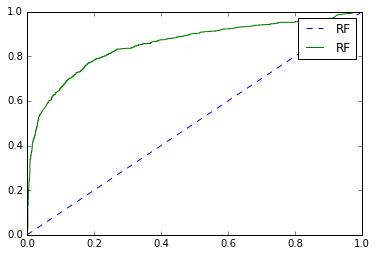

In [27]:
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred_rf[:,1])
print 'AUC:', metrics.auc(fpr_rf, tpr_rf)

print plot([0,1],[0,1],'--', fpr_rf, tpr_rf, label='RF')
legend()

# Prepare the solution

In [32]:
test_data = pd.read_csv("test_data.csv.gz", compression="gzip", encoding="utf8")

In [33]:
features_dict = {}

for author, group in test_data.groupby('author'):
    features_dict[author] = extract_features(group)

In [34]:
X_test = sparse.vstack([features_dict[author] for author in test_data.author.unique()])
X_test

<34887x3866 sparse matrix of type '<type 'numpy.float64'>'
	with 345539 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred = model.predict_proba(X_test)[:,1]

In [ ]:
solution = pd.DataFrame({"author":test_data.author.unique(), "gender":y_pred})
solution.head()

In [ ]:
solution.to_csv("logistic_regression.csv", index=False)